# Feature engineering (preparación de variables)

1. [Definicion](#1)
2. [Imputación](#2)
3. [Valores atípicos](#3)
4. [Binning](#4)
5. [Transformación logarítmica](#5)
6. [One-hot encoding](#6)
7. [Separación de valores](#7)
8. [Ajuste de escala](#8)

## Definición

<a id="1"></a>

__[What Is Feature Engineering](https://medium.com/mindorks/what-is-feature-engineering-for-machine-learning-d8ba3158d97a)__

Proceso de aplicación del conocimiento de los datos de cierto ámbito/dominio para seleccionar o crear variables que mejoren el desempeño de los modelos predictivos. Se recomienda realizar luego del Análisis Exploratorio de Datos.

## Técnicas

- Imputación, manejo de valors faltantes (eliminar o encontrar un valor adecuado)
- Manejo de valores atípicos, eliminarlos o preservarlos.
- Binning, agrupar valores en clases típicamente para convertir variables contínuas en discretas.
- Transformación logaritmica, para lidiar con distribuciones muy asimétricas
- One-hot enconding, convertir variables nominales en 0s y 1s
- Separación de valor (Feature Split), ej convertir nombre completo en nombre y apellido.
- __[Ajuste de escala](https://en.wikipedia.org/wiki/Feature_scaling)__., para ubicar variables en rangos recomendados


<img src="./img/01-feature-engineering.png" style="width:600px"/>

![](./01-eda-visual-techniques.png)

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(os.path.join("./csv/diabetes.csv"))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Imputación

<a id="2"></a>

In [4]:
#df.isnull()
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.loc[3,'Age'] = np.nan
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50.0,1
1,1,85,66,29,0,26.6,0.351,31.0,0
2,8,183,64,0,0,23.3,0.672,32.0,1
3,1,89,66,23,94,28.1,0.167,NaN,0
4,0,137,40,35,168,43.1,2.288,33.0,1


In [6]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,767.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.256845,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.759580,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#df['Age'].isnull()

In [8]:
df.loc[df['Age'].isnull()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,NaN,0


In [9]:
df.shape

(768, 9)

In [10]:
#Eliminación de valores faltantes
df.dropna(how='all').shape

(768, 9)

In [11]:
df.dropna(subset=['Insulin', 'Age'], how='any').shape

(767, 9)

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50.0,1
1,1,85,66,29,0,26.6,0.351,31.0,0
2,8,183,64,0,0,23.3,0.672,32.0,1
3,1,89,66,23,94,28.1,0.167,NaN,0
4,0,137,40,35,168,43.1,2.288,33.0,1


In [13]:
df.dropna(subset=['Insulin', 'Age'], how='any', inplace=True )
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50.0,1
1,1,85,66,29,0,26.6,0.351,31.0,0
2,8,183,64,0,0,23.3,0.672,32.0,1
4,0,137,40,35,168,43.1,2.288,33.0,1
5,5,116,74,0,0,25.6,0.201,30.0,0


In [14]:
#Asignación de valores
df = pd.read_csv(os.path.join("diabetes.csv"))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.loc[3,'Age'] = np.nan

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50.0,1
1,1,85,66,29,0,26.6,0.351,31.0,0
2,8,183,64,0,0,23.3,0.672,32.0,1
3,1,89,66,23,94,28.1,0.167,NaN,0
4,0,137,40,35,168,43.1,2.288,33.0,1


In [17]:
#df['Age'].fillna(0, inplace=True) #Casi nunca es buena idea!
df['Age'].fillna(round(df['Age'].mean()), inplace=True) #Pocas veces es buena idea!
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50.0,1
1,1,85,66,29,0,26.6,0.351,31.0,0
2,8,183,64,0,0,23.3,0.672,32.0,1
3,1,89,66,23,94,28.1,0.167,33.0,0
4,0,137,40,35,168,43.1,2.288,33.0,1


In [18]:
df = pd.read_csv(os.path.join("diabetes.csv"))
df.loc[3,'Age'] = np.nan

In [19]:
df.head()
#df.shape

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50.0,1
1,1,85,66,29,0,26.6,0.351,31.0,0
2,8,183,64,0,0,23.3,0.672,32.0,1
3,1,89,66,23,94,28.1,0.167,NaN,0
4,0,137,40,35,168,43.1,2.288,33.0,1


In [20]:
#df.loc[df['Age'].notnull(),].head()

In [21]:
por_embarazos = df.groupby('Pregnancies')
por_embarazos

In [22]:
por_embarazos.groups

{0: Int64Index([  4,  16,  45,  57,  58,  59,  66,  78,  83, 102,
             ...
             649, 677, 681, 682, 697, 713, 727, 736, 753, 757],
            dtype='int64', length=111),
 1: Int64Index([  1,   3,  13,  18,  19,  27,  46,  50,  51,  55,
             ...
             726, 739, 742, 746, 747, 751, 755, 758, 766, 767],
            dtype='int64', length=135),
 2: Int64Index([  8,  38,  47,  60,  63,  67,  70,  79,  81,  85,
             ...
             707, 709, 728, 729, 732, 733, 734, 738, 760, 764],
            dtype='int64', length=103),
 3: Int64Index([  6,  20,  31,  32,  40,  80, 108, 110, 126, 132, 140, 166, 169,
             190, 197, 227, 234, 242, 256, 260, 261, 263, 272, 304, 313, 316,
             317, 318, 321, 347, 348, 352, 354, 368, 370, 389, 396, 398, 399,
             415, 419, 431, 480, 494, 501, 504, 514, 515, 521, 524, 525, 527,
             539, 541, 551, 570, 572, 588, 592, 610, 611, 615, 644, 659, 673,
             678, 686, 696, 710, 714, 716, 730

#### Se recomienda emplear la métrica de tendencia central que sea menos afectada por valores atípicos:

**La Mediana.**

In [24]:
#por_embarazos.agg({'Age': ['mean','median']})
por_embarazos.agg({'Age': 'median'})

,Age
Pregnancies,
0,25.0
1,24.0
2,25.0
3,27.0
4,30.0
5,36.0
6,36.5
7,41.0
8,43.0


#### El gráfico de caja muestra la media o mediana?

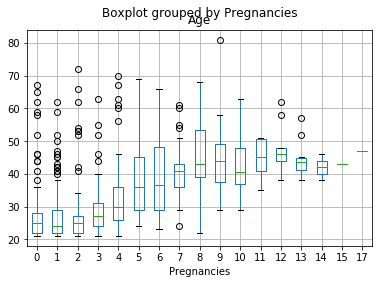

In [25]:
df[df['Age'].notnull()].boxplot('Age','Pregnancies')

In [26]:
por_embarazos

In [27]:
por_embarazos['Age']

In [28]:
por_embarazos['Age'].transform('median')

0      36.5
1      24.0
2      43.0
3      24.0
4      25.0
       ... 
763    40.5
764    25.0
765    36.0
766    24.0
767    24.0
Name: Age, Length: 768, dtype: float64

In [29]:
df['Age'].fillna(por_embarazos['Age'].transform('median'), inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50.0,1
1,1,85,66,29,0,26.6,0.351,31.0,0
2,8,183,64,0,0,23.3,0.672,32.0,1
3,1,89,66,23,94,28.1,0.167,24.0,0
4,0,137,40,35,168,43.1,2.288,33.0,1


## Valores atípicos

<a id="3"></a>

In [30]:
df = pd.read_csv(os.path.join("diabetes.csv"))

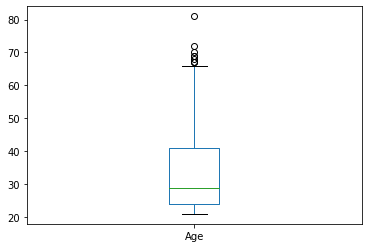

In [31]:
df['Age'].plot.box()

In [32]:
# Identificación basada en percentiles (también existe la basada en la desviación estándar)
q3 = df['Age'].quantile(.75)
q1 = df['Age'].quantile(.25)

IQR = q3 - q1

df.loc[(df['Age'] > q3 + 1.5 * IQR) | (df['Age'] < q1 - 1.5 * IQR)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132,80,0,0,26.8,0.186,69,0
363,4,146,78,0,0,38.5,0.520,67,1
453,2,119,0,0,0,19.6,0.832,72,0
459,9,134,74,33,60,25.9,0.460,81,0
489,8,194,80,0,0,26.1,0.551,67,0
537,0,57,60,0,0,21.7,0.735,67,0
666,4,145,82,18,0,32.5,0.235,70,1
674,8,91,82,0,0,35.6,0.587,68,0
684,5,136,82,0,0,0.0,0.640,69,0


In [33]:
#df = df.loc[(df['Age'] <= q3 + 1.5 * IQR) & (df['Age'] >= q1 - 1.5 * IQR)]
df.loc[(df['Age'] <= q3 + 1.5 * IQR) & (df['Age'] >= q1 - 1.5 * IQR)].shape

(759, 9)

## Binning

<a id="4"></a>

![](https://www.saedsayad.com/images/Binning_1.png)

In [34]:
df = pd.read_csv(os.path.join("diabetes.csv"))

In [35]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [36]:
df['YoungAdult'] = df['Age'].map(lambda age: 1 if age <= 35 else 0 ) # age <= 35 ? 1 : 0
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,YoungAdult
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,1


In [37]:
df.loc[df['YoungAdult'] == 0].shape

(270, 10)

In [38]:
df.loc[df['YoungAdult'] == 1].shape

(498, 10)

In [39]:
#df['BloodPressure_Bin'] = pd.qcut(df['BloodPressure'], 4, labels=['very_low','low','high','very_high'])
pd.qcut(df['BloodPressure'], 4, labels=['very_low','low','high','very_high'])

0           low
1           low
2           low
3           low
4      very_low
         ...   
763        high
764         low
765         low
766    very_low
767         low
Name: BloodPressure, Length: 768, dtype: category
Categories (4, object): [very_low < low < high < very_high]

In [40]:
df['AgeCategogy'] = pd.cut(df['Age'],bins=[0, 35, 55, 120], labels=['young', 'middle', 'old'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,YoungAdult,AgeCategogy
0,6,148,72,35,0,33.6,0.627,50,1,0,middle
1,1,85,66,29,0,26.6,0.351,31,0,1,young
2,8,183,64,0,0,23.3,0.672,32,1,1,young
3,1,89,66,23,94,28.1,0.167,21,0,1,young
4,0,137,40,35,168,43.1,2.288,33,1,1,young


## Transformación logarítmica

<a id="5"></a>

Recuerde que log(0) = infinito

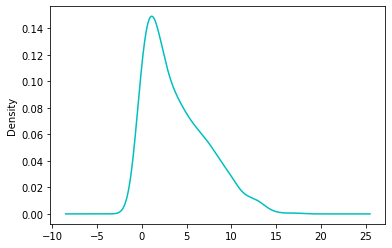

In [41]:
df['Pregnancies'].plot.density(color='c')

In [42]:
df['Pregnancies'].skew()

0.9016739791518588

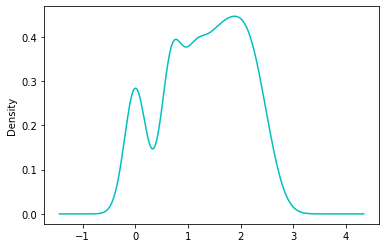

In [43]:
np.log(df['Pregnancies'] + 1.0).plot.density(color='c')

## One-hot encoding

<a id="6"></a>

<img src="./img/02-one-hot-encoding.png" style="width:600px"/>

In [44]:
df = pd.read_csv(os.path.join("diabetes.csv"))

In [45]:
df['AgeCategogy'] = pd.cut(df['Age'],bins=[0, 35, 55, 120], labels=['young', 'middle', 'old'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeCategogy
0,6,148,72,35,0,33.6,0.627,50,1,middle
1,1,85,66,29,0,26.6,0.351,31,0,young
2,8,183,64,0,0,23.3,0.672,32,1,young
3,1,89,66,23,94,28.1,0.167,21,0,young
4,0,137,40,35,168,43.1,2.288,33,1,young


In [46]:
df = pd.get_dummies(df,columns=['AgeCategogy'])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeCategogy_young,AgeCategogy_middle,AgeCategogy_old
0,6,148,72,35,0,33.6,0.627,50,1,0,1,0
1,1,85,66,29,0,26.6,0.351,31,0,1,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1,0,0
3,1,89,66,23,94,28.1,0.167,21,0,1,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1,0,0


## Separación de valores

<a id="7"></a>

In [47]:
df = pd.DataFrame({'Team':['Eagles', 'Bears', 'Raptors', 'Hornets', 'Bees', 'Lions'], 
                     'City':['Rome', 'Helsinki', 'Hong Kong', 'Hong Kong', 'Rome', 'Rome'],
                     'Games':[12, 15, 23, 18, 21, 8],
                     'MVP_Player': ['John Stuart', 'Leo Da Vinci', 'Mike Donatello', 'Raphael Dolce', 'Bruce Lee', 'Mahatma Gandhi']})
df.head()

,Team,City,Games,MVP_Player
0,Eagles,Rome,12,John Stuart
1,Bears,Helsinki,15,Leo Da Vinci
2,Raptors,Hong Kong,23,Mike Donatello
3,Hornets,Hong Kong,18,Raphael Dolce
4,Bees,Rome,21,Bruce Lee


In [48]:
def extract_name(fullname):
    return fullname.split(' ')[0]

In [49]:
#df['Name'] = df['MVP_Player'].apply(lambda fullname: fullname.split(' ')[0])
df['Name'] = df.apply(lambda row: row['MVP_Player'].split(' ')[0], axis = 1 )
df['Name'] = df['MVP_Player'].apply(extract_name)
df.head()

,Team,City,Games,MVP_Player,Name
0,Eagles,Rome,12,John Stuart,John
1,Bears,Helsinki,15,Leo Da Vinci,Leo
2,Raptors,Hong Kong,23,Mike Donatello,Mike
3,Hornets,Hong Kong,18,Raphael Dolce,Raphael
4,Bees,Rome,21,Bruce Lee,Bruce


## Ajuste de escala

<a id="8"></a>

El ajuste de escala es una transformación aplicada a variables numéricas que tiene como objetivo asegurar que los valores de diferentes variables estén en el mismo rango. Esta transformación es necesaria cuando se emplean algoritmos sensibles a las magnitudes de las variables.

El método de ajuste más utilizado se basa en el cálculo del valor z (puntuación estándar, z-score); genera valores centrados en cero y con una desviación estándard igual a 1.

El valor Z mide las desviaciones estándar de distancia entre un valor y la media.

__[Boston house prices dataset](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)__

In [50]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [51]:
boston_dataset  = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [52]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [53]:
array = scaler.transform(df)
array

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [54]:
df_scaled = pd.DataFrame(array, columns=df.columns)
df_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [55]:
#Revisión con menos datos
data = [[-1]
        , [-0.5]
        , [0]
        , [1]
       ]
scaler.fit(data)
scaler.transform(data)

array([[-1.18321596],
       [-0.50709255],
       [ 0.16903085],
       [ 1.52127766]])

In [56]:
mean_a = np.array([-1,-0.5, 0, 1]).mean()
std_a = np.array([-1,-0.5, 0, 1]).std()

In [57]:
print(mean_a)
print(std_a)

-0.125
0.739509972887452


In [58]:
(-1 - mean_a) / std_a

-1.1832159566199232

In [59]:
(data[3][0] - mean_a) / std_a

1.52127765851133